# Cost Function 그리기

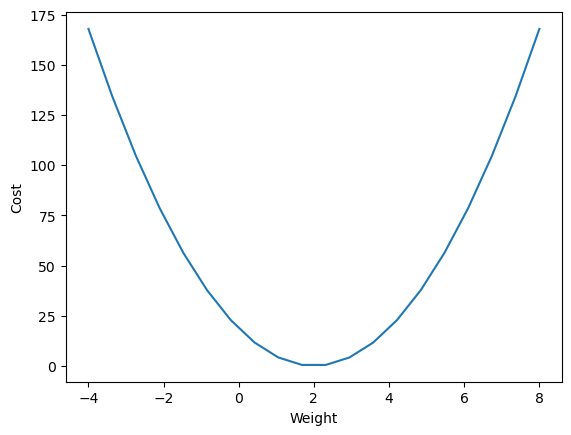

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def MSE(w, x, y, b): # 정답은 y, 절편은 b // 비용함수 - 오차를 제곱하고 다 더해서 평균내는 함수
    s = 0
    for i in range(len(x)):
        s += (y[i] - (w*x[i]+b))**2
    return s /len(x)

# y = 2x + 0.1 모델 가정 - 선형식 표시
x = [1., 2., 3.] # 입력변수, 독립변수, Feature /// 실수로 입력함
y = [2.1, 4.1, 6.1] # 출력변수, 종속변수, Label
b = 0.1

# 코스트..? 코스타 함수 그리기...?
w_val = [] # 가중치 저장할 변수
cost_val = [] # <SE를 통해 만들어진 오차(비용) 저장할 변수

# 균등분할 한 수를 MSE에 대입함 -> 비용을 측정
for w in np.linspace(-4, 8, 20): # [14 ~ 8 까지 20개로 균등분할]
    c = MSE(w, x, y, b)  # c = 비용
    w_val.append(w)
    cost_val.append(c)

plt.plot(w_val, cost_val)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.show()

# 가중치 학습
- https://scikit-learn.org/
- 머신러닝 관련 패키지

-0.09027529589850945 0.17055522598064407


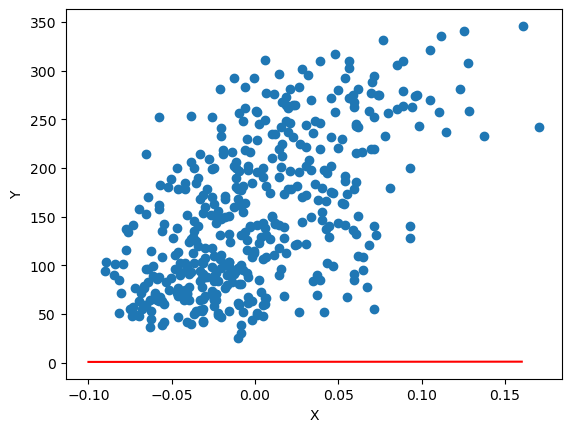

In [38]:
from sklearn.datasets import load_diabetes
# load 다음에 가져오고 싶은 데이터 샘플 명 작성하면 됨
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 데이터셋 불러오기 - 10차원 데이터 //  10차원 데이터는 그래프로 보이지 않음
diabetes = load_diabetes() # 딕셔너리 비슷한 형태로 도출됨
# print(diabetes.DESCR) # 샘플데이터 확인 // .DESCR - 설명글 가져오는 것
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names) # .data = 독립변수 값을 가져오게 됨
# display(df.head())

# 회귀선의 시작점과 끝점을 찾기 위해 BMI의 최소, 최대 값 확인(# 학습되기 전 회귀선 -bmi의 max, min 값 구하기)
print(np.min(diabetes.data[:,2]), np.max(diabetes.data[:,2]))

w = 1.0 # 초기 가중치 임의 선정
b = 1.0 # 초기 절편

# 학습되기 전 회귀선 생성
pt1= (-0.1, -0.1*w+b) # 회귀선의 시작점 (x, y)
pt2 = (0.16, 0.16*w+b) # 회귀선의 끝점(x, y)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r') # x 좌표와 y 좌표 필요

plt.scatter(diabetes.data[:,2], diabetes.target) # 산점도 사용
plt.xlabel('X') # bmi
plt.ylabel('Y') # 종속변수
plt.show()

학습된 가중치:913.60
학습된 절편:123.39


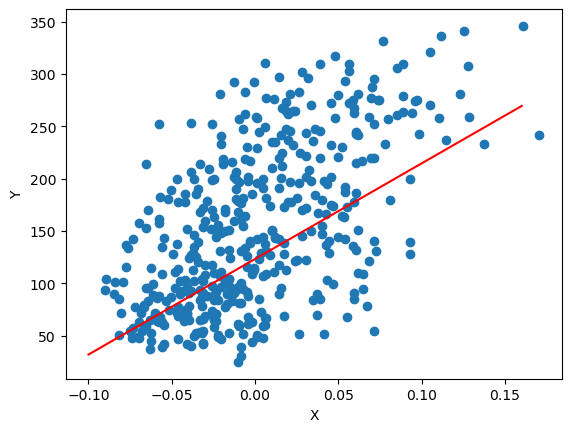

In [44]:
x = diabetes.data[:,2]
y = diabetes.target

for i in range(100): #100번 반복하여 학습하겠다 라는 뜻을 가지고 있음
    for x_i, y_i in zip(x,y): # 데이터 불러기기
        y_hat = w*x_i + b # 추정값 생성
        w = w - (y_hat - y_i) * x_i
        b = b - (y_hat - y_i)

print(f'학습된 가중치:{w:.2f}')
print(f'학습된 절편:{b:.2f}')

pt1= (-0.1, -0.1*w+b) 
pt2 = (0.16, 0.16*w+b) 
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r') 
# 오차를 최소화 할 수 있는 회귀 추정식
plt.scatter(diabetes.data[:,2], diabetes.target) 
plt.xlabel('X') # bmi
plt.ylabel('Y') # 종속변수
plt.show()

# Linear Regression - 1

In [53]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 1) 데이터 준비 단계
X = np.array([1,3,2,4,7,4,9,2,3,2,6,3,2,7]) # 머신러닝에서 입력 값은 Vector 형태로 들어가야 한다. [[1],[3], .....] -> 2차월 열백터
X = X.reshape(-1,1) # X = np.exand-dims(X, axis = 1)
# print(X)
y = np.array([3,9,6,7,10,6,12,2,4,8,5,10,8,9])

# 2) 모델 준비 단계
model = LinearRegression()

# 3) 학습(fitting) 단계
model.fit(X, y) # 추정회귀식 도출 => y = wX + b

# 4) 모델 성능 평가(evaluate) 단계
r_square = model.score(X, y) # 결정 계수
print('R square:', r_square)

# 5) 새로운 데이터에 대한 예측(predict)
X_new = [[7]]
y_hat = model.predict(X_new)
print('예측값:',y_hat)

R square: 0.3582171935801467
예측값: [9.28789323]


# Linear Regression - 2

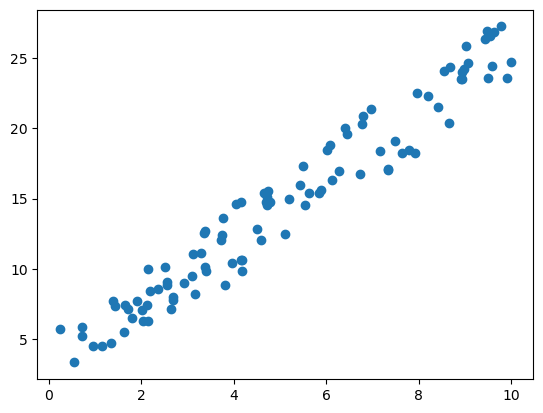

결정계수:0.93
가중치: [[2.25132954]]
절편: [3.44159707]


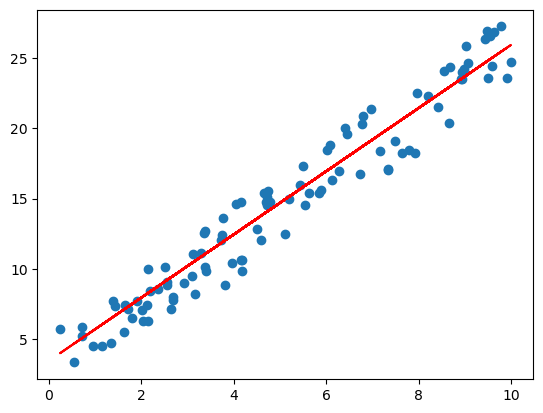

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 1) 데이터 준비
X = np.random.rand(100,1) * 10 # 0이상 10 미만의 값을 만들어 냄, 100행 1열의 행열로 생성
y = (X * 2.3) + np.random.rand(100,1) * 5.4 # 2.3 기울기 값

plt.plot(X, y, 'o')
plt.show()

# 2) 모델 준비
model = LinearRegression()

# 3) 학습 데이터와 평가 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                  test_size = 0.3, # train_size = 0.7
                                                  random_state = 10 # 랜덤 분할의 시드값 지정
                                                  )

# 4) 학습
model.fit(X_train, y_train)

# 5) 평가
r_square = model.score(X_test, y_test)
print('결정계수:%.2f'%r_square)

# 6) 추정계수 확인
print('가중치:',model.coef_)
print('절편:',model.intercept_)

# 7) 예측 및 예측 결과 시각화
plt.plot(X, y, 'o')
plt.plot(X, model.predict(X), 'r')
plt.show()

# [실습] 키와 몸무게를 이용해 선형회귀 모델을 학습 시킨 후, 키 170인 사람의 몸무게를 예측하는 프로그램을 작성하세요.

(1000, 3)


,Number,Height,Weight
0,1,176.0,85.2
1,2,175.3,67.7
2,3,168.6,75.2
3,4,168.1,67.1
4,5,175.3,63.0


결정계수: 0.039627276864017236
키 170인 사람의 예측 몸무게: [70.11219281]


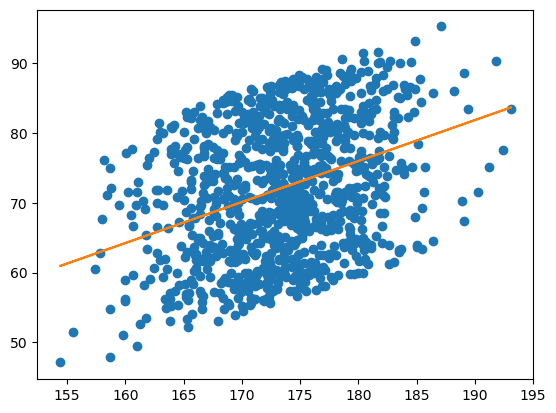

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1) 데이터 준비
df = pd.read_csv('./dataset/body.csv')
print(df.shape)
display(df.head())

X = df['Height'].values.reshape(-1,1)
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

# 2) 모델 준비
model = LinearRegression()

# 3) 학습
model.fit(X_train, y_train)

# 4) 평가
r_square = model.score(X_test, y_test)
print('결정계수:', r_square)

# 5) 예측
X_new = [[170]]
y_hat= model.predict(X_new)
print('키 170인 사람의 예측 몸무게:', y_hat)

plt.plot(X, y, 'o')
plt.plot(X, model.predict(X))
plt.show()

In [95]:
df[df['Height'] == 170]['Weight'].mean()

70.25714285714285

# [실습] 캘리포니아 집값 예측
- 1990년 캘리포니아 블록 그룹마다의 주택 가격 데이터

(17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


(3000, 9)
결정계수:0.64
MAE:48500.03
RMSE:67910.45
예측값: [134220.]
실제값: 125000.0


<Axes: xlabel='median_house_value', ylabel='Density'>

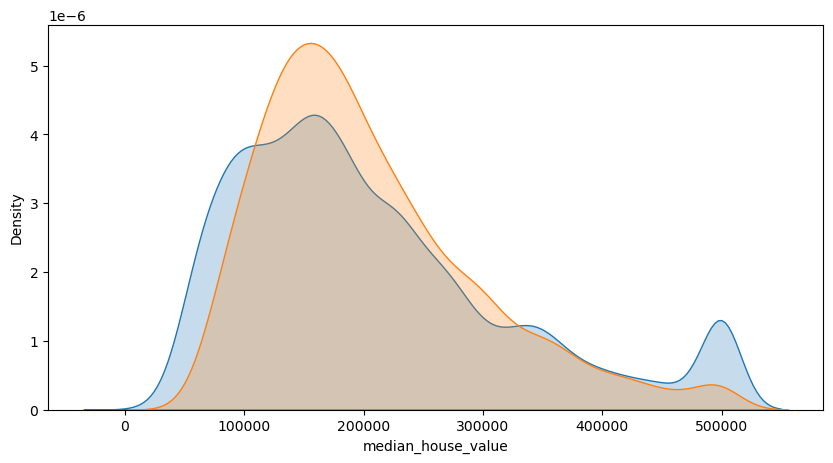

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1) 데이터 준비
data = pd.read_csv('./dataset/california_housing_train.csv')
print(data.shape)
display(data.head())
X_val_columns = data.columns[2:8].values
# print(X_val_columns)

X_train = data[X_val_columns]
y_train = data['median_house_value']

# 2) 모델 준비
# model = LinearRegression()
model = RandomForestRegressor()

# 3) 학습
model.fit(X_train, y_train)

# 4) 모델 평가
test_data = pd.read_csv('./dataset/california_housing_test.csv')
print(test_data.shape)
X_test = test_data[X_val_columns]
y_test = test_data['median_house_value']
r_square = model.score(X_test,y_test) # score 값을 이용하여 square 값을 구함 [.score(독립변수, 종속변수)]

y_pred = model.predict(X_test) # 평가데이터를 가지고 예측값을 만들어냄
r_square = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test,y_pred) # (정답값, 예측값?)

mse = mean_squared_error(y_test,y_pred)

print('결정계수:%.2f'%r_square)

print('MAE:%.2f'%mae)
print('RMSE:%.2f'%np.sqrt(mse))

# 예측
predict_data = X_test[10:11]
house_value = model.predict(predict_data)
print('예측값:',house_value)
print('실제값:', y_test.iloc[10])

# 예측 값과 실제 값 비교 시각화
y_hat = model.predict(X_test)
# 히스토그램과 비슷 // 확률밀도그래프 -> 히스토그램과 유사하나 각 데이터의 구간별 빈도수를 확률적으로 추정하여 부드러운 곡선으로 표현하는 그래프
plt.figure(figsize=(10,5))
sns.kdeplot(y_train, label='y', fill=True)
sns.kdeplot(y_hat, label='y_hat', fill=True)